In [76]:
#Loaded the appropriate packages for analysis
library(tidyverse)
library(tidymodels)
library(dplyr)
library(purrr)

In [77]:
#Read the data, and added colummn names/headings
cleveland<-read.delim("processed.cleveland.data", header=FALSE, sep=",")
cleveland<- rename(cleveland, 
                   age= V1,
                   sex= V2,
                   cp= V3,
                   trestbp= V4,
                   chol= V5,
                   fbs= V6,
                   restecg= V7,
                thalach= V8,
                   exang = V9,
                   oldpeak = V10,
                   slope =V11,
                   ca = V12,
                   thal = V13,
                   num= V14) 
#Converted the num column(which tells us the severity and if the patient has heart disease) to a factor
#note that 0 means no heart disease, and 1-4 mean increasing levels of heart disease
cleveland|> mutate(num=as_factor(num))

age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [78]:
#selected only the columns that we will be using for our analysis
cleveland<-cleveland|> select(age, trestbp, chol, fbs, num)

In [79]:
#setting the seed
set.seed(1)
#created training(75%) and testing data 
cleveland_split<- initial_split(cleveland, prop=0.75, strata= num)
cleveland_train<- training(cleveland_split)
cleveland_test<- testing(cleveland_split)

In [102]:
cleveland_train

,age,trestbp,chol,fbs,num
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63,145,233,1,0
5,41,130,204,0,0
12,56,140,294,0,0
16,57,150,168,0,0
20,49,130,266,0,0
21,64,110,211,0,0
22,58,150,283,1,0
25,60,130,206,0,4
26,50,120,219,0,0


In [95]:
#table containing the average values of all predictors of each severity of heart disease
average_predictors<-cleveland_train|> group_by(num)|>
summarize(across(age:fbs, mean))
average_predictors

num,age,trestbp,chol,fbs
<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,52.68548,129.7339,244.2903,0.12096774
1,55.68293,133.4878,248.7561,0.04878049
2,57.56000,133.9200,265.0000,0.20000000
3,55.15385,132.5769,241.7308,0.19230769
4,60.50000,139.0000,232.6000,0.10000000


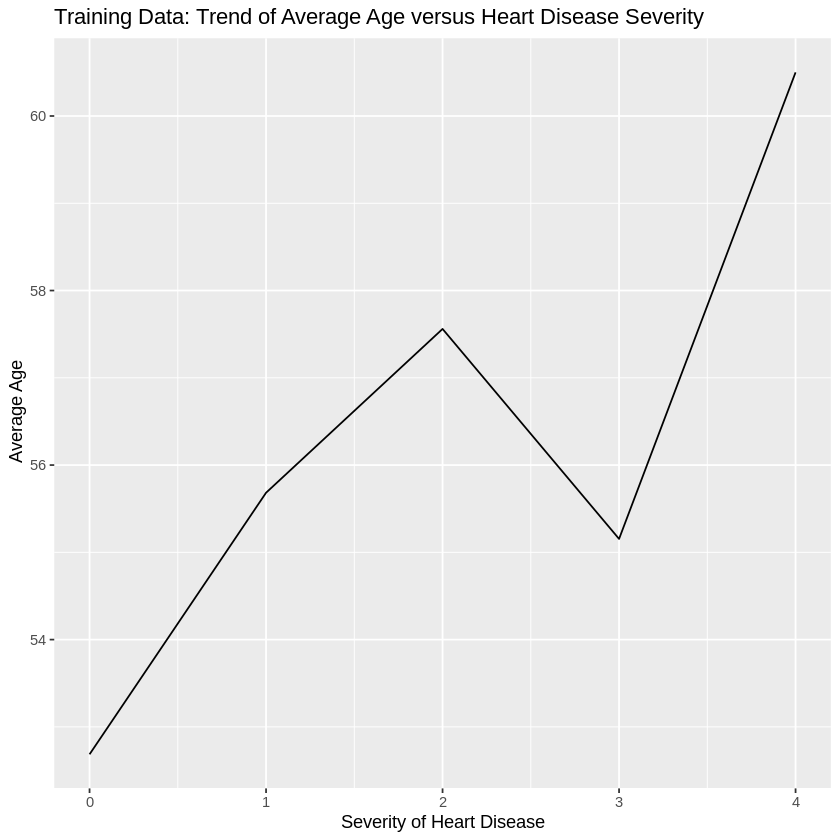

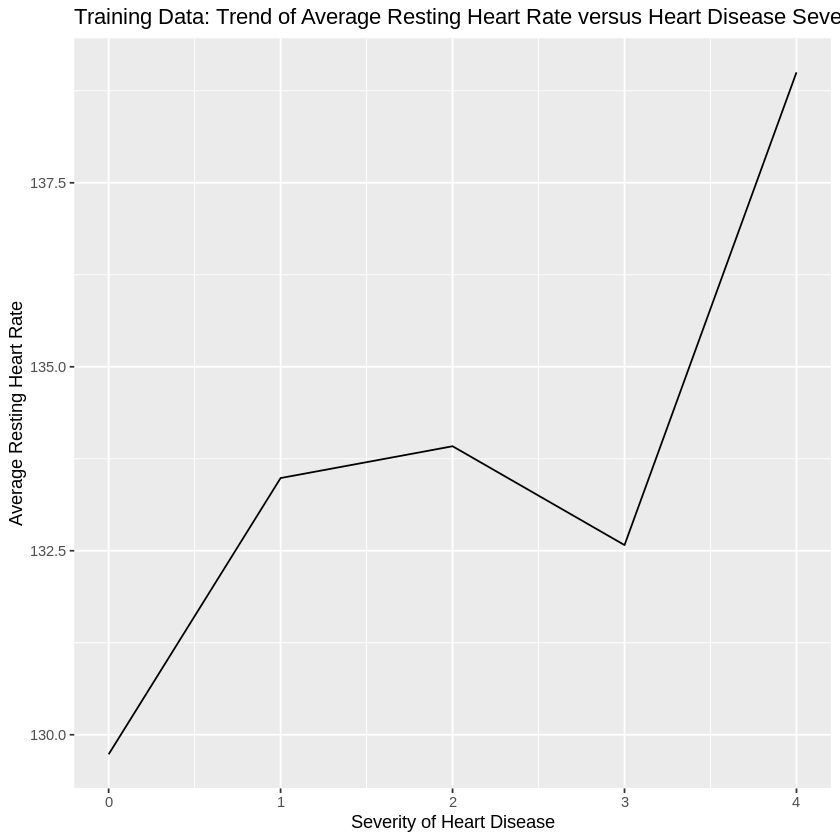

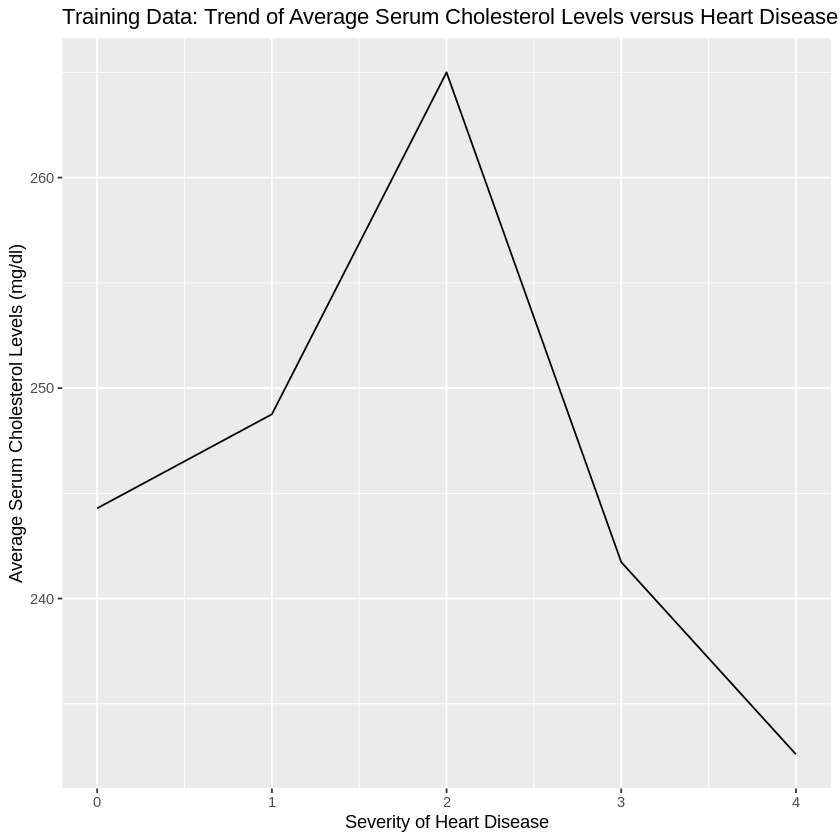

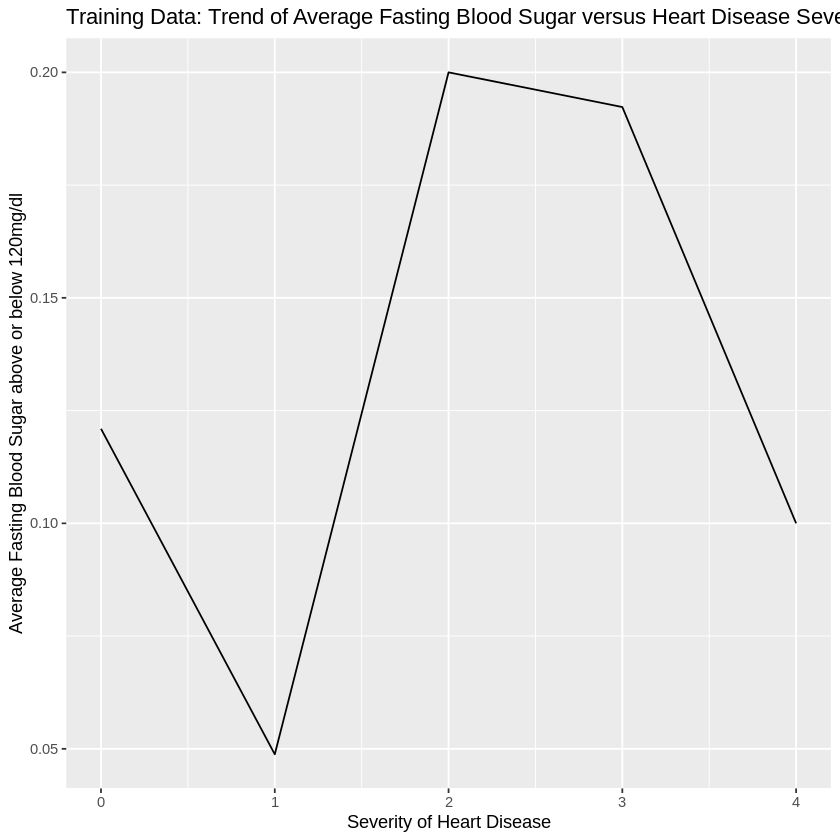

In [117]:
#graphs showing trends in predictor variables segregated by each class of heart disease severity. Note that each y-axis variable is the average value for each class of num 

cleveland_agenum_trend<- average_predictors|> ggplot(aes(x=num, y=age))+geom_line(stat="identity")+ labs(x="Severity of Heart Disease", y=" Average Age")+ ggtitle ("Training Data: Trend of Average Age versus Heart Disease Severity")
cleveland_agenum_trend

cleveland_trestbpnum_trend<- average_predictors|> ggplot(aes(x=num, y=trestbp))+geom_line(stat="identity")+ labs(x="Severity of Heart Disease", y="Average Resting Heart Rate")+ ggtitle ("Training Data: Trend of Average Resting Heart Rate versus Heart Disease Severity")
cleveland_trestbpnum_trend

cleveland_cholnum_trend<- average_predictors|> ggplot(aes(x=num, y=chol))+geom_line(stat="identity")+ labs(x="Severity of Heart Disease", y="Average Serum Cholesterol Levels (mg/dl)")+ ggtitle ("Training Data: Trend of Average Serum Cholesterol Levels versus Heart Disease Severity")
cleveland_cholnum_trend

cleveland_fbsnum_trend<- average_predictors|> ggplot(aes(x=num, y=fbs))+geom_line(stat="identity")+ labs(x="Severity of Heart Disease", y="Average Fasting Blood Sugar above or below 120mg/dl")+ ggtitle ("Training Data: Trend of Average Fasting Blood Sugar versus Heart Disease Severity")
cleveland_fbsnum_trend

#From these plots, we can see that there are changes in the predictor variable values for each class of the num variable 
